#Diabetic prediction
____________
By Ahmed ali

##1) importing library
here we are importing needed library

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


##2) Reading data




In [5]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,636.0,3.786164,3.251388,0.000,1.00000,3.000,6.000,13.000
Glucose,636.0,118.869497,28.996773,44.000,99.00000,114.000,136.250,198.000
BloodPressure,636.0,72.007862,11.301102,38.000,64.00000,72.000,80.000,106.000
SkinThickness,636.0,20.745283,15.231688,0.000,0.00000,23.000,32.000,60.000
Insulin,636.0,69.017296,83.601857,0.000,0.00000,42.500,122.000,330.000
BMI,636.0,31.964151,6.384132,18.200,27.30000,32.000,36.000,49.600
DiabetesPedigreeFunction,636.0,0.426237,0.245088,0.078,0.23875,0.361,0.583,1.162
Age,636.0,32.555031,10.879807,21.000,24.00000,29.000,40.000,65.000
Outcome,636.0,0.309748,0.462754,0.000,0.00000,0.000,1.000,1.000


In [23]:
df['Outcome'].value_counts()

,count
Outcome,
0,439
1,197


##3) Cleaning

In [24]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [27]:
def CountNulls() :
    global df
    for col in df.columns :
        if not df[col].isna().sum() == 0 :
            print(f'Column {col} has number of nulls {df[col].isna().sum()}')
    print('Counting Nulls Ends .')
CountNulls()

Counting Nulls Ends .


In [28]:
df.duplicated().sum()

0

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

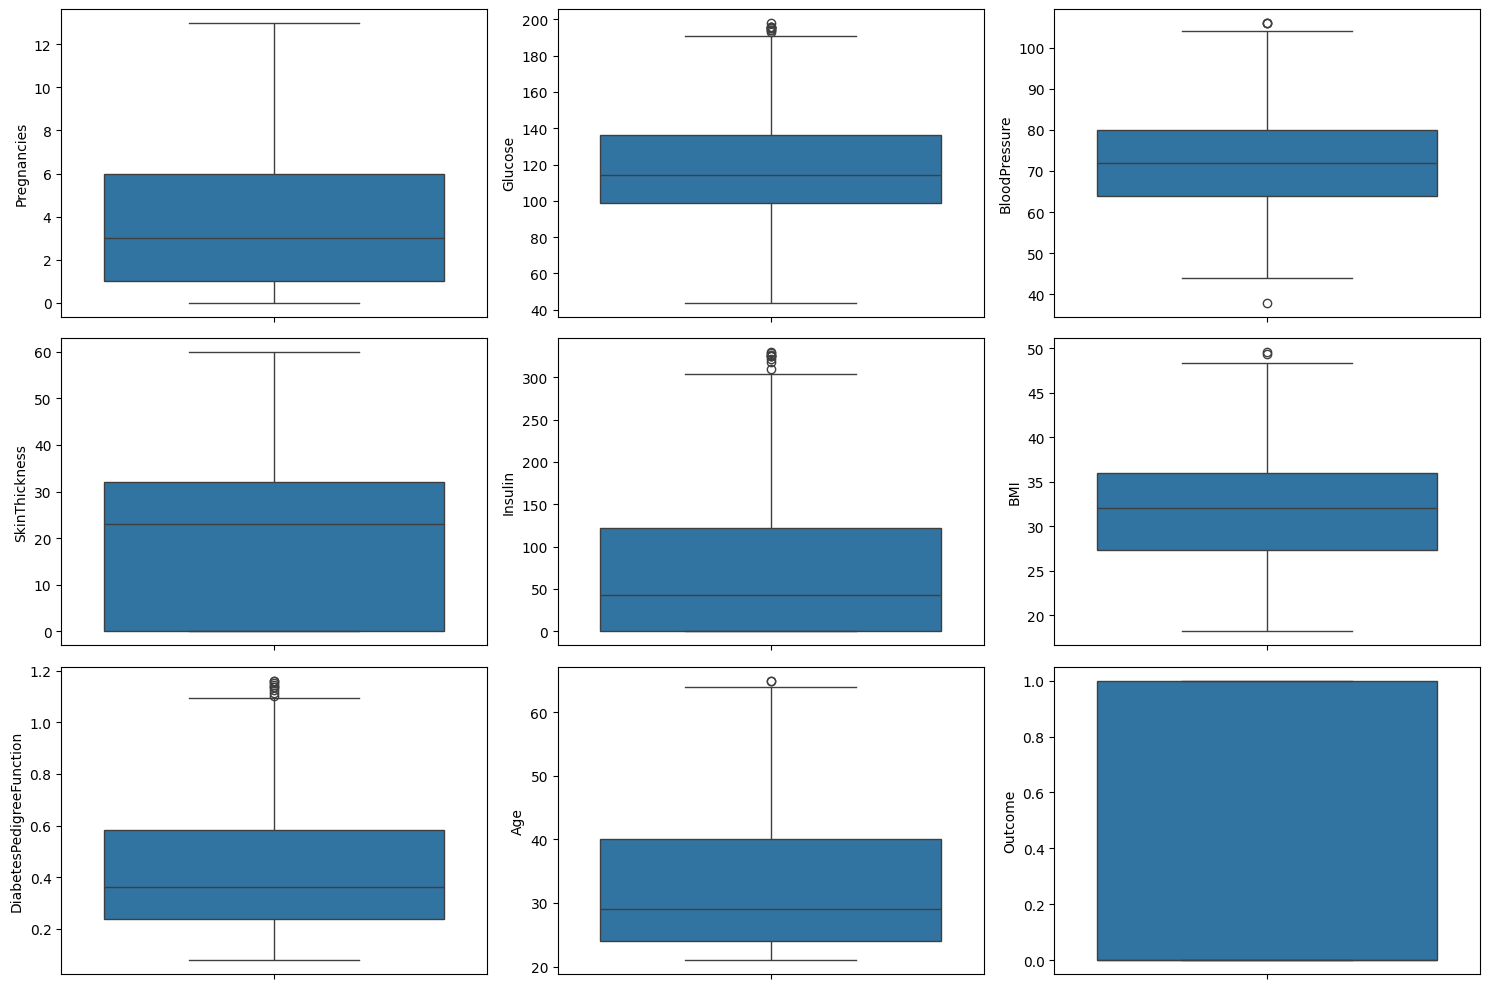

In [57]:
fig, axes = plt.subplots(3,3,figsize=(15,10))
for i,col in enumerate(df.columns):
    row,col_position = divmod(i,3)
    sns.boxplot(data=df,y=col,ax=axes[row,col_position])
    plt.tight_layout()
plt.show()

In [19]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in df.columns:
    df=remove_outliers(df,col)

##4) Modeling

In [58]:
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [60]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data
Y = df['Outcome']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

##Trying all classifier to choose best one

In [42]:

# GaussianNBModel = GaussianNB()
# BernoulliNBModel = BernoulliNB(alpha=1.0,binarize=1)
# LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
# RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=300,max_depth=7,random_state=33)
# GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=33)
# QDAModel = QuadraticDiscriminantAnalysis(tol=0.0001)
# SVCModel = SVC(kernel= 'rbf',max_iter=100,C=1.0,gamma='auto')
# DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33)
# KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform',algorithm='auto')

# Models = [GaussianNBModel,KNNClassifierModel,
#           BernoulliNBModel,LogisticRegressionModel,RandomForestClassifierModel,
#           GBCModel,QDAModel,SVCModel,DecisionTreeClassifierModel]


# ###########################################


# ModelsScore = {}
# for Model in Models :
#     print(f'for Model {str(Model).split("(")[0]}')
#     Model.fit(X_train, y_train)
#     print(f'Train Score is : {Model.score(X_train, y_train)}')
#     print(f'Test Score is : {Model.score(X_test, y_test)}')
#     y_pred = Model.predict(X_test)
#     ClassificationReport = classification_report(y_test,y_pred)
#     print('Classification Report is : \n', ClassificationReport )
#     print(f'Precision value is  : {ClassificationReport.split()[19]}')
#     print(f'Recall value is  : {ClassificationReport.split()[20]}')
#     print(f'F1 Score value is  : {ClassificationReport.split()[21]}')
#     ModelsScore[str(Model).split("(")[0]] = [ClassificationReport.split()[19],
#                                              ClassificationReport.split()[20],ClassificationReport.split()[21]]
#     print('=================================================')

for Model GaussianNB
Train Score is : 0.7716535433070866
Test Score is : 0.7578125
Classification Report is : 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        88
           1       0.63      0.55      0.59        40

    accuracy                           0.76       128
   macro avg       0.72      0.70      0.71       128
weighted avg       0.75      0.76      0.75       128

Precision value is  : 0.72
Recall value is  : 0.70
F1 Score value is  : 0.71
for Model KNeighborsClassifier
Train Score is : 0.8405511811023622
Test Score is : 0.7421875
Classification Report is : 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        88
           1       0.61      0.47      0.54        40

    accuracy                           0.74       128
   macro avg       0.70      0.67      0.68       128
weighted avg       0.73      0.74      0.73       128

Precision value is  : 0.70
Recall v

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [62]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [63]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [64]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7893700787401575


In [65]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the training data : ', test_data_accuracy)

Accuracy score of the training data :  0.8046875
